In [39]:
# Created by Adam Simcoe - 101442161
# last Updated - April 12th, 2025

# Imports
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, regularizers
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
# Load CIFAR-10 dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


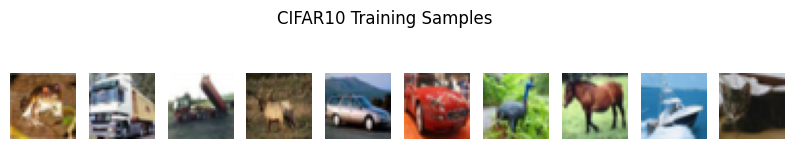

In [41]:
# Print original shape of x and y train
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Print sample training images from dataset to verify
plt.figure(figsize=(10, 2))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.suptitle("CIFAR10 Training Samples")
plt.show()

In [42]:
# Normalize image values from 0 - 255 to 0 - 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [43]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print new label shape to verify change
print(f"Shape after one-hot encoding: {y_train.shape}")

Shape after one-hot encoding: (50000, 10)


In [44]:
# Split training set data into 70/30 training/validation splits to help with generalization during training
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.3, random_state=39)

# Print new split shapes
print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_validate.shape}")

Training set shape: (35000, 32, 32, 3)
Validation set shape: (15000, 32, 32, 3)


In [21]:
# Data augmentation to simulate more training data with rotation shifting and flipping
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Fit augmented training data to x_train
datagen.fit(x_train)

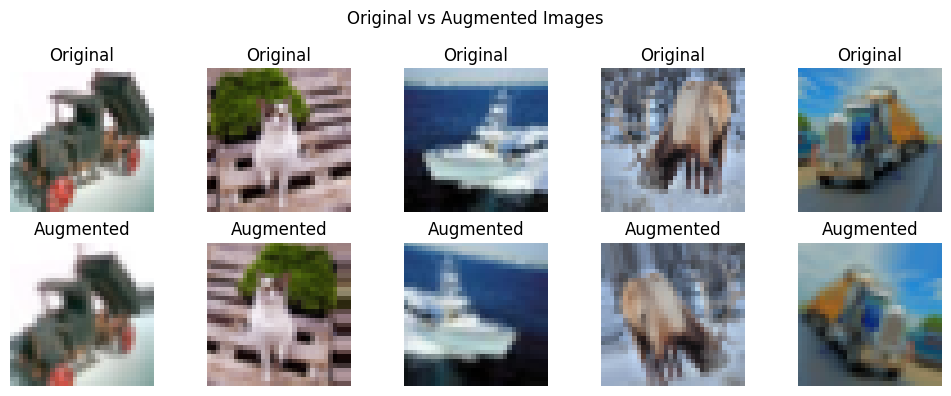

In [33]:
# Selects first 5 sample images from x_train and augments them
sample_images = x_train[:5]
augmented_iterator = datagen.flow(sample_images, batch_size=5, shuffle=False)
augmented_images = next(augmented_iterator)

# Graph comparison of original vs augmented images
plt.figure(figsize=(10, 4))

# Original images
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title("Original")
    plt.axis('off')

# Augmented versions
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(augmented_images[i])
    plt.title("Augmented")
    plt.axis('off')

plt.suptitle("Original vs Augmented Images")
plt.tight_layout()
plt.show()

In [23]:
# Model A setup with 2 conv layers, max pooling, dropout, and dense layers
modelA = models.Sequential()

modelA.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))
modelA.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
modelA.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelA.add(layers.Dropout(0.25))
modelA.add(layers.Flatten())
modelA.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
modelA.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile model A
modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model A using augmented data for 50 epochs
historyA = modelA.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_validate, y_validate), verbose=2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 - 27s - 50ms/step - accuracy: 0.3943 - loss: 1.8749 - val_accuracy: 0.4813 - val_loss: 1.5981
Epoch 2/50
547/547 - 20s - 36ms/step - accuracy: 0.4814 - loss: 1.6133 - val_accuracy: 0.5081 - val_loss: 1.5654
Epoch 3/50
547/547 - 19s - 35ms/step - accuracy: 0.5146 - loss: 1.5560 - val_accuracy: 0.5641 - val_loss: 1.4241
Epoch 4/50
547/547 - 20s - 36ms/step - accuracy: 0.5324 - loss: 1.5141 - val_accuracy: 0.5823 - val_loss: 1.3937
Epoch 5/50
547/547 - 19s - 35ms/step - accuracy: 0.5463 - loss: 1.4880 - val_accuracy: 0.5899 - val_loss: 1.3820
Epoch 6/50
547/547 - 19s - 35ms/step - accuracy: 0.5591 - loss: 1.4617 - val_accuracy: 0.6154 - val_loss: 1.3300
Epoch 7/50
547/547 - 19s - 35ms/step - accuracy: 0.5718 - loss: 1.4342 - val_accuracy: 0.6195 - val_loss: 1.2942
Epoch 8/50
547/547 - 19s - 34ms/step - accuracy: 0.5784 - loss: 1.4156 - val_accuracy: 0.6241 - val_loss: 1.2928
Epoch 9/50
547/547 - 20s - 36ms/step - accuracy: 0.5863 - loss: 1.3999 - val_accuracy: 0.6327 - val_loss: 1

In [26]:
# Evaluate model A's performance using testing data
test_loss, test_accur = modelA.evaluate(x_test, y_test, verbose=2)

# Print test accuracy and test loss scores for Model A
print(f"\nTest Accuracy: {test_accur:.4f}, Test Loss: {test_loss:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.6778 - loss: 1.1958

Test Accuracy: 0.6778, Test Loss: 1.1958


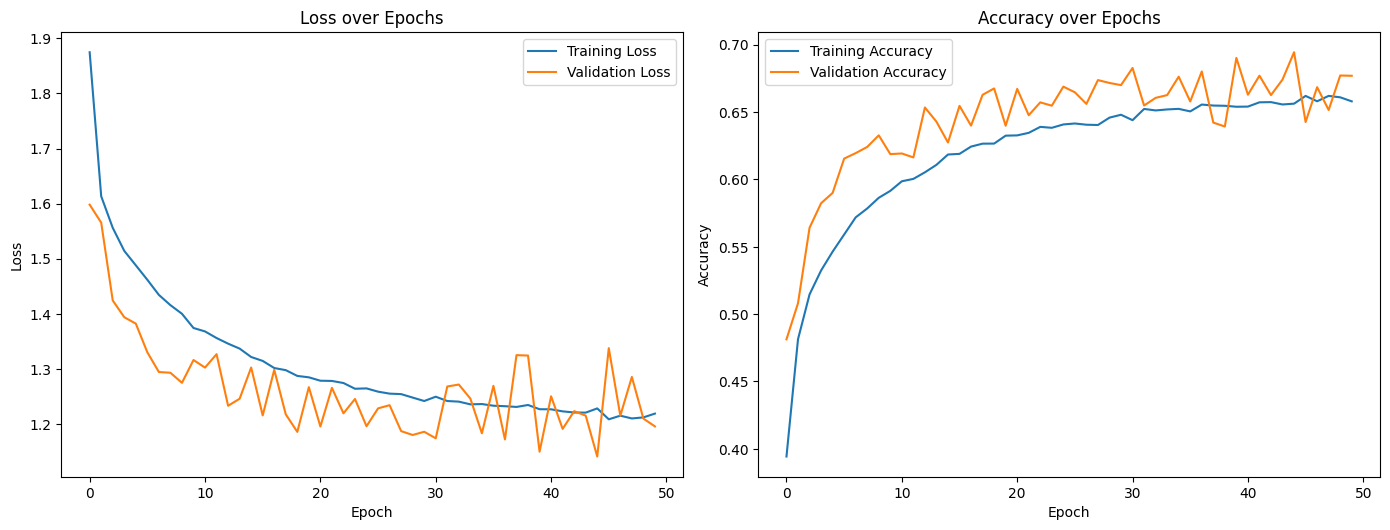

In [27]:
# Comparison graph for Model A's Loss and Accuracy
plt.figure(figsize=(14, 10))

# Loss comparison subplot
plt.subplot(2, 2, 1)
plt.plot(historyA.history['loss'], label='Training Loss')
plt.plot(historyA.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison subplot
plt.subplot(2, 2, 2)
plt.plot(historyA.history['accuracy'], label='Training Accuracy')
plt.plot(historyA.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Model B setup, with two extra conv layers with increased filters, an extra dropout layer, higher dropout, and batch normalization
modelB = models.Sequential()

modelB.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))
modelB.add(layers.BatchNormalization())
modelB.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
modelB.add(layers.BatchNormalization())
modelB.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelB.add(layers.Dropout(0.35))

# Extra block of layers - increased conv filter amount, extra dropout and max pooling layer
modelB.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelB.add(layers.BatchNormalization())
modelB.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelB.add(layers.BatchNormalization())
modelB.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelB.add(layers.Dropout(0.45))

# Flatten and dense block, reduced dense layer
modelB.add(layers.Flatten())
modelB.add(layers.Dense(256, activation='relu'))
modelB.add(layers.BatchNormalization())
modelB.add(layers.Dropout(0.5))
modelB.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile model B
modelB.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model B using augmented data for 50 epochs
historyB = modelB.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_validate, y_validate), verbose=2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 - 43s - 78ms/step - accuracy: 0.3807 - loss: 1.9018 - val_accuracy: 0.4518 - val_loss: 1.5732
Epoch 2/50
547/547 - 23s - 41ms/step - accuracy: 0.5124 - loss: 1.3946 - val_accuracy: 0.5955 - val_loss: 1.1553
Epoch 3/50
547/547 - 22s - 41ms/step - accuracy: 0.5685 - loss: 1.2337 - val_accuracy: 0.5951 - val_loss: 1.2282
Epoch 4/50
547/547 - 43s - 78ms/step - accuracy: 0.6055 - loss: 1.1411 - val_accuracy: 0.6574 - val_loss: 1.0002
Epoch 5/50
547/547 - 40s - 73ms/step - accuracy: 0.6259 - loss: 1.0839 - val_accuracy: 0.5263 - val_loss: 1.4938
Epoch 6/50
547/547 - 40s - 73ms/step - accuracy: 0.6477 - loss: 1.0255 - val_accuracy: 0.6534 - val_loss: 1.0309
Epoch 7/50
547/547 - 22s - 41ms/step - accuracy: 0.6634 - loss: 0.9772 - val_accuracy: 0.6971 - val_loss: 0.8797
Epoch 8/50
547/547 - 43s - 79ms/step - accuracy: 0.6725 - loss: 0.9526 - val_accuracy: 0.7073 - val_loss: 0.8734
Epoch 9/50
547/547 - 21s - 38ms/step - accuracy: 0.6844 - loss: 0.9195 - val_accuracy: 0.5176 - val_loss: 1

In [30]:
# Evaluate model B's performance using testing data
test_loss, test_accur = modelB.evaluate(x_test, y_test, verbose=2)

# Print test accuracy and test loss scores for Model B
print(f"\nTest Accuracy: {test_accur:.4f}, Test Loss: {test_loss:.4f}")

313/313 - 1s - 5ms/step - accuracy: 0.7516 - loss: 0.7656

Test Accuracy: 0.7516, Test Loss: 0.7656


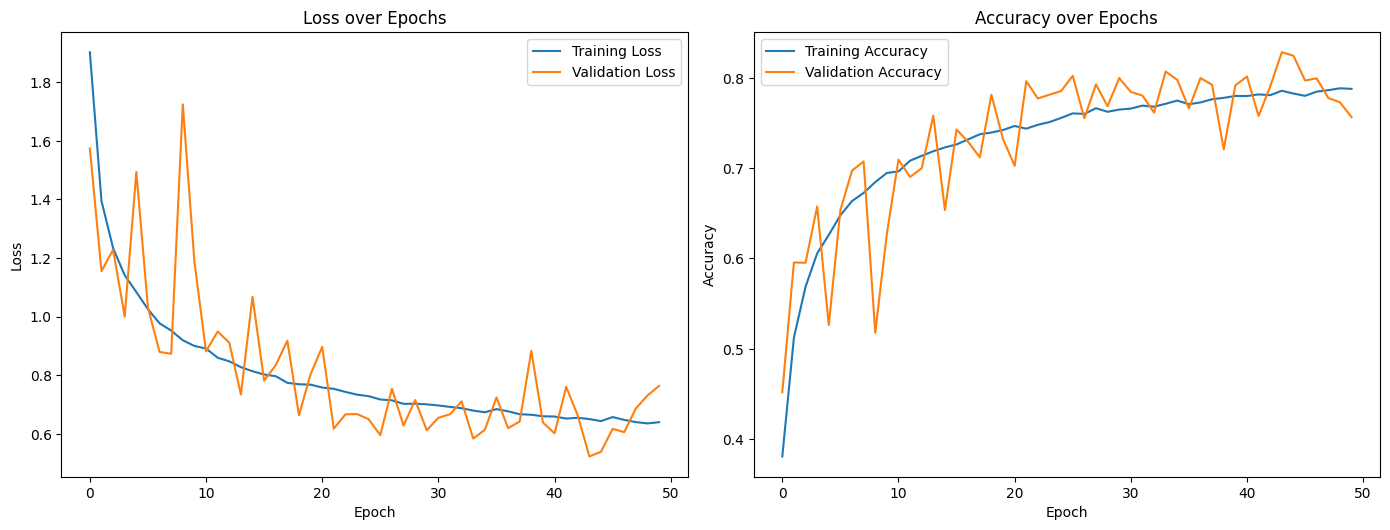

In [31]:
# Comparison graph for Model B's Loss and Accuracy
plt.figure(figsize=(14, 10))

# Loss comparison subplot
plt.subplot(2, 2, 1)
plt.plot(historyB.history['loss'], label='Training Loss')
plt.plot(historyB.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Acccuracy comparison subplot
plt.subplot(2, 2, 2)
plt.plot(historyB.history['accuracy'], label='Training Accuracy')
plt.plot(historyB.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Model C setup with an added extra block, 128 filters for new conv layers, Increased dropout
modelC = models.Sequential()

# Original block from Model A
modelC.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)))
modelC.add(layers.BatchNormalization())
modelC.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
modelC.add(layers.BatchNormalization())
modelC.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelC.add(layers.Dropout(0.35))

# Original extra block from Model B
modelC.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelC.add(layers.BatchNormalization())
modelC.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelC.add(layers.BatchNormalization())
modelC.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelC.add(layers.Dropout(0.45))

# Extra block layer, 128 filters
modelC.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
modelC.add(layers.BatchNormalization())
modelC.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
modelC.add(layers.BatchNormalization())
modelC.add(layers.MaxPooling2D(pool_size=(2, 2)))
modelC.add(layers.Dropout(0.55))

# Flatten and Dense block
modelC.add(layers.Flatten())
modelC.add(layers.Dense(256, activation='relu'))
modelC.add(layers.BatchNormalization())
modelC.add(layers.Dropout(0.6))
modelC.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile Model C with added label smoothing to reduce overconfidence in predictions
modelC.compile(optimizer='adam', loss=CategoricalCrossentropy(label_smoothing=0.1), metrics=['accuracy'])

# Uses val accuracy to track improvement, stops training early if no improvement for 10 epochs and rolls back to epoch with highest val accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

# Uses val loss to modify learning rate, if no improvement for 5 epochs it reduces learning rate
# Helps improve accuracy when loss is stagnant
learning_rate_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

In [11]:
# Train Model C using augmented data for 75 epochs with added callbacks
historyC = modelC.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=75, validation_data=(x_validate, y_validate), callbacks=[early_stopping, learning_rate_schedule], verbose=2)

Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 - 49s - 90ms/step - accuracy: 0.3043 - loss: 2.3025 - val_accuracy: 0.3689 - val_loss: 1.8799 - learning_rate: 1.0000e-03
Epoch 2/75
547/547 - 22s - 41ms/step - accuracy: 0.4492 - loss: 1.7253 - val_accuracy: 0.4369 - val_loss: 1.8289 - learning_rate: 1.0000e-03
Epoch 3/75
547/547 - 25s - 46ms/step - accuracy: 0.5119 - loss: 1.5865 - val_accuracy: 0.5753 - val_loss: 1.4860 - learning_rate: 1.0000e-03
Epoch 4/75
547/547 - 23s - 42ms/step - accuracy: 0.5636 - loss: 1.4890 - val_accuracy: 0.5693 - val_loss: 1.5321 - learning_rate: 1.0000e-03
Epoch 5/75
547/547 - 23s - 43ms/step - accuracy: 0.6004 - loss: 1.4183 - val_accuracy: 0.6239 - val_loss: 1.3848 - learning_rate: 1.0000e-03
Epoch 6/75
547/547 - 21s - 38ms/step - accuracy: 0.6243 - loss: 1.3714 - val_accuracy: 0.6713 - val_loss: 1.2745 - learning_rate: 1.0000e-03
Epoch 7/75
547/547 - 21s - 39ms/step - accuracy: 0.6512 - loss: 1.3160 - val_accuracy: 0.6437 - val_loss: 1.3445 - learning_rate: 1.0000e-03
Epoch 8/75
547/547 - 22s

In [13]:
# Evaluate Model C's performance using test data
test_loss, test_accur = modelC.evaluate(x_test, y_test, verbose=2)

# Print test accuracy and test loss scores for Moel C
print(f"\nTest Accuracy: {test_accur:.4f}, Test Loss: {test_loss:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.8515 - loss: 0.8806

Test Accuracy: 0.8515, Test Loss: 0.8806


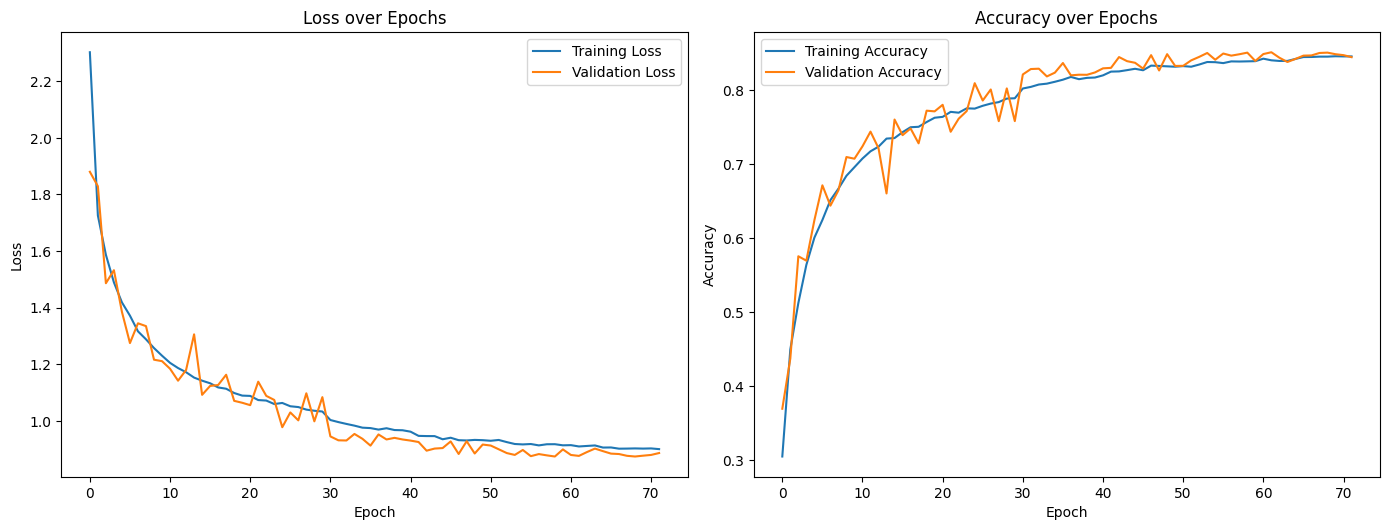

In [14]:
# Comparison graph for Model C's accuracy and loss
plt.figure(figsize=(14, 10))

# Loss comparison subplot
plt.subplot(2, 2, 1)
plt.plot(historyC.history['loss'], label='Training Loss')
plt.plot(historyC.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison subplot
plt.subplot(2, 2, 2)
plt.plot(historyC.history['accuracy'], label='Training Accuracy')
plt.plot(historyC.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

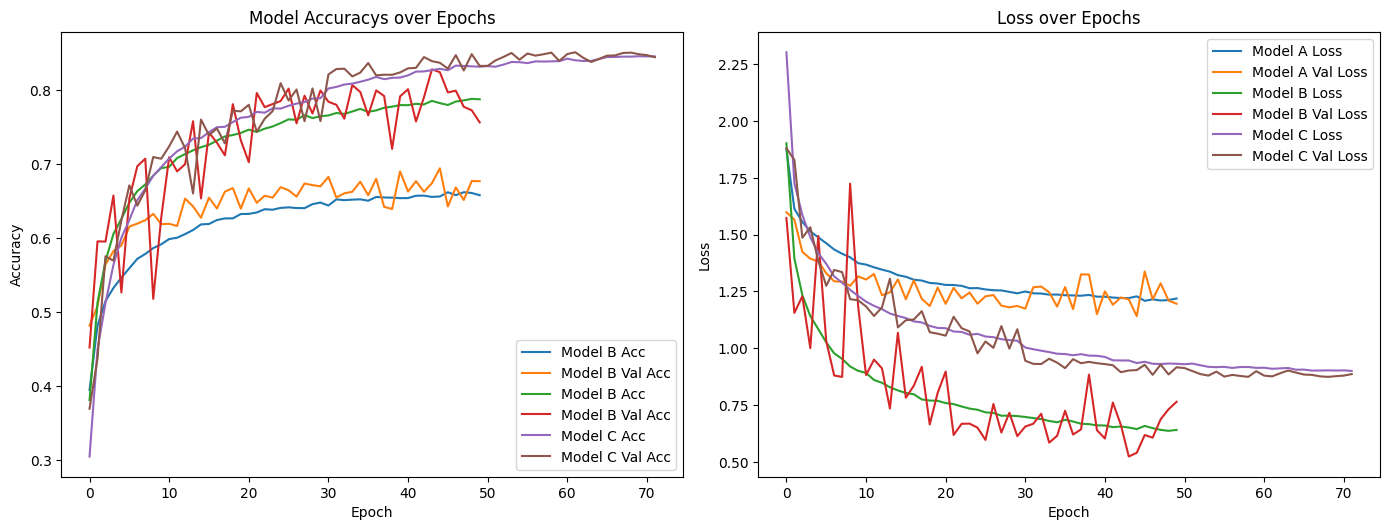

In [37]:
# Comparison graph for all 3 models accuracy and loss results
plt.figure(figsize=(14, 10))

# Accuracy comparison subplot
plt.subplot(2, 2, 1)
plt.plot(historyA.history['accuracy'], label='Model B Acc')
plt.plot(historyA.history['val_accuracy'], label='Model B Val Acc')
plt.plot(historyB.history['accuracy'], label='Model B Acc')
plt.plot(historyB.history['val_accuracy'], label='Model B Val Acc')
plt.plot(historyC.history['accuracy'], label='Model C Acc')
plt.plot(historyC.history['val_accuracy'], label='Model C Val Acc')
plt.title('Model Accuracys over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison subplot
plt.subplot(2, 2, 2)
plt.plot(historyA.history['loss'], label='Model A Loss')
plt.plot(historyA.history['val_loss'], label='Model A Val Loss')
plt.plot(historyB.history['loss'], label='Model B Loss')
plt.plot(historyB.history['val_loss'], label='Model B Val Loss')
plt.plot(historyC.history['loss'], label='Model C Loss')
plt.plot(historyC.history['val_loss'], label='Model C Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()